Vamos a Clasificar Imagenes de ropa y prendas de vestir de un Dataset de fashon minst de Tensorflow que trae imagenes de remeras, pantalones, carteras, zapatillas, botas, bolsos entre otros para entrenar nuestro modelo

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fminst = tf.keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fminst.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0  90 156 177 182 196 176 117   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 239 253 239 214 226 214 231 245 248   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 241 203 219 192 190 193 207 200 232 135   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  33 167 227 229 234 228 234 244 215 211 214 208 120   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0 157 227 207 207 229 229 232 207 241 227 235 224 203 221 176   0   0   2   0   0   0   0]
 [  0   0   0   0   0  65 218 189 192 187 196 189 188 202 181 195 222 219 190 180 217 125   0   0   0   0   0   0]
 [  0   0   0   0   0 158 213 196 196 191 188 186 179 192 177 192 126 155 193 189 200 166   0   0   0   0   0   0]
 [  0   0   0   0   0 163 217 211 176 188 188 186 183 196 180 191 165 170 216 204 200 195   0   0   0   0   0   0]
 [  0   0   0   0   0 183 215 234 185 182 186 183 184 198 181 185 195 188 203 24

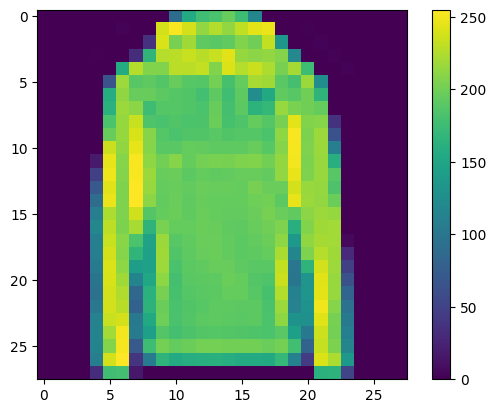

In [4]:
imagen = 24

labels = {
    0: "Remera",
    1: "Pantalones",
    2: "Sueters",
    3: "Vestidos",
    4: "Abrigo",
    5: "Sandalias",
    6: "Camisas",
    7: "Zapatillas",
    8: "Bolso",
    9: "Botas"
}

np.set_printoptions(linewidth=320)
print(X_train[imagen])
print("Label " + labels[y_train[imagen]])

plt.imshow(X_train[imagen])
plt.colorbar()
plt.show()

* Las imagenes tienen un tamaño de 28x28
* Cada pixel es un valor entre 0 y 255
* Los datos no estan normalizados (Las redes neuronales funcionan mejor con datos normalizados)
* Hay 10 labels
  * 0 - Remera
  * 1 - Pantaloes
  * 2 - Sueters
  * 3 - Vestidos
  * 4 - Abrigo
  * 5 - Santalias
  * 6 - Camisas
  * 7 - Zapatillas
  * 8 - Bolso
  * 9 - Botas

In [5]:
# Normalizamos los datos
X_train = X_train / 255.0
X_test = X_test / 255.0
#Convierte cada pixel en un valor entre 0 y 1 para mejorar la prediccion del modelo

In [6]:
modelo_v1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    #Reduzco el size de la imagen
    tf.keras.layers.MaxPooling2D(2, 2),
    #Siempre que trabajamos con imagenes (matrices) tenemos que aplanar la entrada para que sea un vector
    tf.keras.layers.Flatten(),
    #Capas intermedias...
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #Capa de Salida...
    #Para problemas de clasificacion vamos a utilizar una capa de salita softmax
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
modelo_v1.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo_v1.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7362 - loss: 0.7683
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8285 - loss: 0.4698
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8457 - loss: 0.4218
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8541 - loss: 0.3953
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8566 - loss: 0.3796
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8673 - loss: 0.3604
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3479
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8748 - loss: 0.3361
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8758 - loss: 0.3279
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8807 - loss: 0.3218
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.3206
Epoch 12/100
1875/1

In [9]:
modelo_v1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.5075


[0.5221854448318481, 0.8683000206947327]

Evaluamos el modelo con los datos de entrenamiento y nos da una presicion de 0.85 y una perdida de 0.4

[[0.         0.         0.         0.         0.         0.         0.         0.         0.26666667 0.52941176 0.31764706 0.11372549 0.         0.01960784 0.         0.14117647 0.30196078 0.60784314 0.64313725 0.32156863 0.01568627 0.         0.         0.         0.00392157 0.         0.00392157 0.        ]
 [0.         0.         0.         0.         0.         0.         0.38823529 0.79607843 0.69019608 0.72941176 0.73333333 0.85098039 0.84313725 0.86666667 0.73333333 1.         0.54117647 0.69411765 0.74117647 0.63921569 0.78431373 0.43529412 0.01960784 0.         0.00784314 0.         0.         0.        ]
 [0.         0.         0.00392157 0.         0.         0.65882353 0.73333333 0.65490196 0.63137255 0.63921569 0.61568627 0.59215686 0.66666667 0.12941176 0.45098039 0.61960784 0.         0.37254902 0.6745098  0.59607843 0.64313725 0.69019608 0.56470588 0.00784314 0.         0.00784314 0.         0.        ]
 [0.         0.         0.         0.         0.35294118 0.7254902 

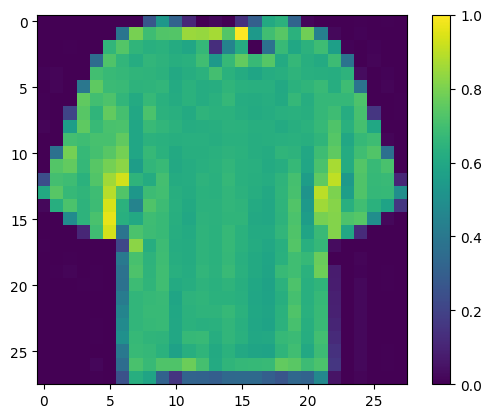

In [11]:
imagen = 77

labels = {
    0: "Remera",
    1: "Pantalones",
    2: "Sueters",
    3: "Vestidos",
    4: "Abrigo",
    5: "Sandalias",
    6: "Camisas",
    7: "Zapatillas",
    8: "Bolso",
    9: "Botas"
}

np.set_printoptions(linewidth=320)
print(X_train[imagen])
print("Label " + labels[y_train[imagen]])

plt.imshow(X_train[imagen])
plt.colorbar()
plt.show()

Probamos otra Arquitectura para mejorar el modelo

In [12]:
modelo_v2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    #Siempre que trabajamos con imagenes (matrices) tenemos que aplanar la entrada para que sea un vector
    tf.keras.layers.Flatten(),
    #Capas intermedias...
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    #Capa de Salida...
    #Para problemas de clasificacion vamos a utilizar una capa de salita softmax
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
modelo_v2.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo_v2.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7630 - loss: 0.6756
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8594 - loss: 0.3929
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8723 - loss: 0.3550
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8824 - loss: 0.3200
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8842 - loss: 0.3111
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8936 - loss: 0.2881
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8963 - loss: 0.2804
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8999 - loss: 0.2696
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9041 - loss: 0.2586
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9073 - loss: 0.2517
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9066 - loss: 0.2469
Epoch 12/50
1875/1875 ━━━━━━━━

In [14]:
modelo_v2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.5077


[0.4962844252586365, 0.8838000297546387]

Evaluamos el modelo con los datos de entrenamiento y nos da una leve mejoria de de 0.88 y una perdida de 0.50

In [15]:
modelo_v3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    #Antes de achicar la imagen le digo a la IA que pruebe distintos filtros
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Reduzco el size de la imagen
    tf.keras.layers.MaxPooling2D(2, 2),
    #Otra Convolucion y otro Pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Reduzco el size de la imagen
    tf.keras.layers.MaxPooling2D(2, 2),
    #Siempre que trabajamos con imagenes (matrices) tenemos que aplanar la entrada para que sea un vector
    tf.keras.layers.Flatten(),
    #Capas intermedias...
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #Capa de Salida...
    #Para problemas de clasificacion vamos a utilizar una capa de salita softmax
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
modelo_v3.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo_v3.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.7813 - loss: 0.6086
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 46ms/step - accuracy: 0.8862 - loss: 0.3073
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.9092 - loss: 0.2475
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9187 - loss: 0.2180
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 46ms/step - accuracy: 0.9266 - loss: 0.1956
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 45ms/step - accuracy: 0.9389 - loss: 0.1684
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9468 - loss: 0.1468
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.9508 - loss: 0.1301
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9560 - loss: 0.1154
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 48ms/step - accuracy: 0.9632 - loss: 0.1002
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 44ms/step - accuracy: 0.9660 - loss: 0.0883
Epo

In [17]:
modelo_v3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9089 - loss: 0.9532


[0.9267702102661133, 0.9100000262260437]

Con esta nueva Arquitectura vemos una mejora del 0.90 y perdida de 0.95

[[0.         0.         0.         0.01568627 0.         0.         0.         0.         0.         0.         0.63529412 0.81568627 0.61960784 0.61960784 0.63137255 0.60784314 0.61176471 0.7254902  0.44313725 0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.00784314 0.56470588 0.88235294 0.98431373 0.80784314 0.55686275 0.76862745 0.64705882 0.58431373 0.6        0.68235294 0.89019608 0.96862745 0.52156863 0.         0.         0.         0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.41176471 0.77254902 0.90196078 0.90980392 0.90196078 0.85098039 0.75686275 0.65882353 0.32156863 0.5372549  0.83137255 0.81568627 0.83137255 0.88235294 0.91764706 0.83921569 0.51764706 0.         0.         0.00392157 0.         0.        ]
 [0.         0.         0.         0.         0.         0.57254902

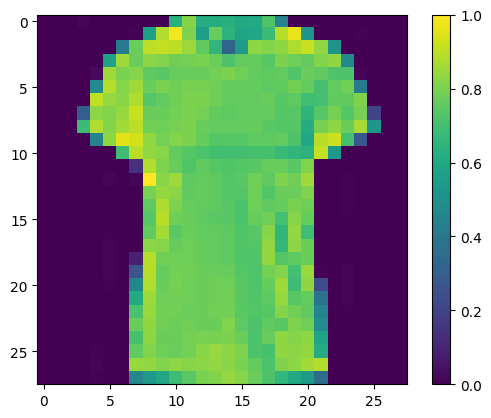

In [18]:
imagen = 66

labels = {
    0: "Remera",
    1: "Pantalones",
    2: "Sueters",
    3: "Vestidos",
    4: "Abrigo",
    5: "Sandalias",
    6: "Camisas",
    7: "Zapatillas",
    8: "Bolso",
    9: "Botas"
}

np.set_printoptions(linewidth=320)
print(X_train[imagen])
print("Label " + labels[y_train[imagen]])

plt.imshow(X_train[imagen])
plt.colorbar()
plt.show()

In [6]:
modelo_v4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    #Antes de achicar la imagen le digo a la IA que pruebe distintos filtros
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Reduzco el size de la imagen
    tf.keras.layers.MaxPooling2D(2, 2),
    #Siempre que trabajamos con imagenes (matrices) tenemos que aplanar la entrada para que sea un vector
    tf.keras.layers.Flatten(),
    #Capas intermedias...
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #Capa de Salida...
    #Para problemas de clasificacion vamos a utilizar una capa de salita softmax
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
modelo_v4.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo_v4.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8192 - loss: 0.5126
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9053 - loss: 0.2582
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9216 - loss: 0.2154
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9351 - loss: 0.1739
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9428 - loss: 0.1536
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9557 - loss: 0.1222
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9637 - loss: 0.1025
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9710 - loss: 0.0813
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0718
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0591
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9823 - loss: 0.0499
Epoch 12/50
1875/1875 ━━━━━━━━

In [8]:
modelo_v4.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9073 - loss: 0.9333


[0.9008244276046753, 0.9103000164031982]

[[0.         0.         0.         0.         0.         0.         0.         0.01176471 0.         0.         0.         0.0745098  0.8        0.36470588 0.1372549  0.35686275 0.89019608 0.35686275 0.         0.         0.         0.01176471 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.00784314 0.         0.         0.5254902  0.82352941 0.92941176 0.94509804 0.94509804 1.         0.96078431 0.93333333 0.94509804 0.97254902 0.43529412 0.         0.         0.01176471 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.68627451 0.99607843 0.92156863 0.91372549 0.90980392 0.88235294 0.89019608 0.88627451 0.89803922 0.90588235 0.9254902  0.98039216 0.78431373 0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

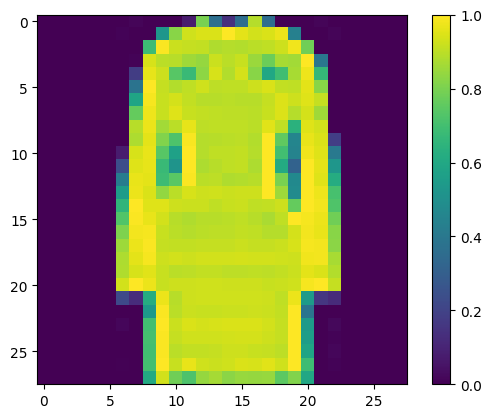

In [10]:
imagen = 500

labels = {
    0: "Remera",
    1: "Pantalones",
    2: "Sueters",
    3: "Vestidos",
    4: "Abrigo",
    5: "Sandalias",
    6: "Camisas",
    7: "Zapatillas",
    8: "Bolso",
    9: "Botas"
}

np.set_printoptions(linewidth=320)
print(X_train[imagen])
print("Label " + labels[y_train[imagen]])

plt.imshow(X_train[imagen])
plt.colorbar()
plt.show()